In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\SAHIL SHINGNE\\Desktop\\heart.csv")

In [3]:
dumy1=pd.get_dummies(df.cp)

In [4]:
dumy1.drop(3,axis=1,inplace=True)

In [5]:
dumy2=pd.get_dummies(df.restecg)

In [6]:
dumy2.drop(2,axis=1,inplace=True)

In [7]:
dumy3=pd.get_dummies(df.slope)

In [8]:
dumy3.drop(2,axis=1,inplace=True)

In [9]:
dumy4=pd.get_dummies(df.ca)

In [10]:
dumy4.drop(4,axis=1,inplace=True)

In [11]:
dumy5=pd.get_dummies(df.thal)

In [12]:
dumy5.drop(3,axis=1,inplace=True)

In [13]:
dumy1.rename(columns = {0:"a",1:"b",2:"c"}, inplace = True)

In [14]:
dumy2.rename(columns = {0:"d",1:"e"}, inplace = True)

In [15]:
dumy3.rename(columns = {0:"f",1:"g"}, inplace = True)

In [16]:
dumy4.rename(columns = {0:"h",1:"i",2:"j",3:"k"}, inplace = True)

In [17]:
dumy5.rename(columns = {0:"l",1:"m",2:"n"}, inplace = True)

In [18]:
df1=df.drop(["cp","restecg","slope","ca","thal"],axis=1)

In [19]:
df2=pd.concat([df1,dumy1,dumy2,dumy3,dumy4,dumy5],axis=1)

In [20]:
df2

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,a,...,e,f,g,h,i,j,k,l,m,n
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,1,0,0,0,0,1,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,1,0,1,0,0,0,0,0,1
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,1,0,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,1,0,0,0,0,0,1
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,1,...,1,0,1,1,0,0,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,0,1,1,0,0,0,0,0,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,1,0,0,0,0
301,57,1,130,131,0,115,1,1.2,0,1,...,1,0,1,0,1,0,0,0,0,0


In [21]:
x=df2.drop(["target"],axis=1).copy()
y=df2["target"].copy()

In [22]:
corr_matrix=df2.corr()
corr_matrix["target"].sort_values(ascending=True)

a          -0.516015
exang      -0.436757
oldpeak    -0.430696
g          -0.362053
sex        -0.280937
j          -0.273998
i          -0.232412
age        -0.225439
k          -0.210615
d          -0.159775
trestbps   -0.144931
m          -0.106589
chol       -0.085239
f          -0.063554
fbs        -0.028046
l          -0.007293
e           0.175322
b           0.245879
c           0.316742
thalach     0.421741
h           0.465590
n           0.527334
target      1.000000
Name: target, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
import matplotlib.pyplot as plt

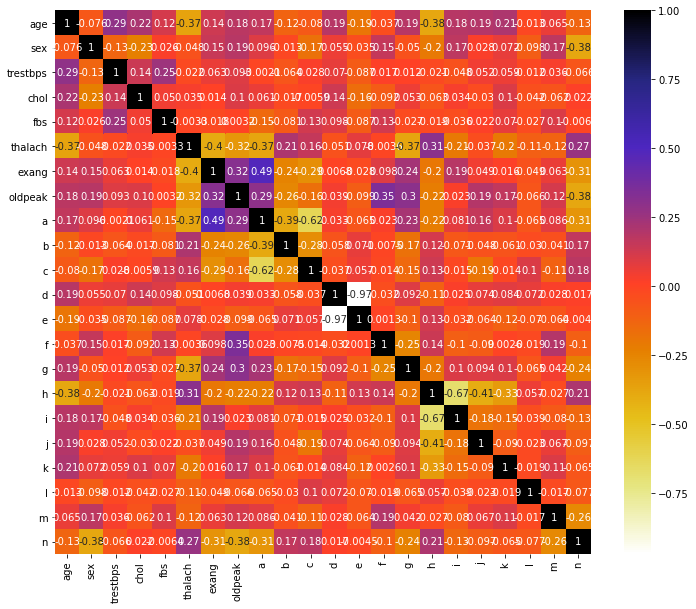

In [25]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
def correlation(data, threshold):
    col_cor=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [27]:
cor_feature=correlation(x_train,0.85)
len(set(cor_feature))

1

In [28]:
x_train.drop(["e","l"],axis=1,inplace=True)

C:\Users\SAHIL SHINGNE\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [32]:
x_test.drop(["e","l"],axis=1,inplace=True)
scaler=StandardScaler()
X_test=scaler.fit_transform(x_test)

C:\Users\SAHIL SHINGNE\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
pred_y=classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred_y)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred_y)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred_y)
print("Accuracy:",result2)

Confusion Matrix:
[[35  7]
 [12 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.79        42
           1       0.87      0.79      0.83        58

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100

Accuracy: 0.81


In [35]:
from sklearn.ensemble import RandomForestClassifier  
cls= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
cls.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
pred=cls.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)

Confusion Matrix:
[[35  7]
 [15 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        42
           1       0.86      0.74      0.80        58

    accuracy                           0.78       100
   macro avg       0.78      0.79      0.78       100
weighted avg       0.79      0.78      0.78       100

Accuracy: 0.78
